# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [7]:
cities

['sechura',
 'matagami',
 'puerto ayora',
 'plaine magnien',
 'butaritari',
 'broome',
 'kapaa',
 'lebu',
 'chokurdakh',
 'taolanaro',
 'kisangani',
 'dauphin',
 'gornopravdinsk',
 'petropavlovsk-kamchatskiy',
 'nouadhibou',
 'dikson',
 'bluff',
 'hithadhoo',
 'port alfred',
 'tiksi',
 'palabuhanratu',
 'porto belo',
 'copala',
 'rikitea',
 'portland',
 'jamestown',
 'punta arenas',
 'rawson',
 'taoudenni',
 'klaksvik',
 'ximei',
 'mataura',
 'vaini',
 'ilulissat',
 'olympia',
 'illoqqortoormiut',
 'provideniya',
 'mashhad',
 'cape town',
 'beringovskiy',
 'khatanga',
 'attawapiskat',
 'dingle',
 'longyearbyen',
 'obo',
 'gobabis',
 'saint-philippe',
 'aklavik',
 'hobart',
 'paradwip',
 'aparecida do taboado',
 'omis',
 'northam',
 'hovd',
 'pisco',
 'capreol',
 'norman wells',
 'vaitupu',
 'sorong',
 'barrow',
 'kegayli',
 'mahebourg',
 'kawalu',
 'houma',
 'fortuna',
 'sentyabrskiy',
 'inyonga',
 'thompson',
 'ushuaia',
 'ingham',
 'torbay',
 'biak',
 'qaanaaq',
 'poum',
 'luderitz',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
record = 0
sets = 1

city_dicts = []

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    
    if (((record % 50) == 0) & (record >= 50)):
        sets += 1
    
    record_num = (record % 50) + 1
    record +=1
    
    city_url = url + "&q=" + city
    
    print(f"Processing Record {record_num} of Set {sets} | {city}")
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_dicts.append({"City": city_weather['name'], 
                          "Lat": city_weather['coord']['lat'], 
                          "Lng": city_weather['coord']['lon'], 
                          "Max Temp": city_weather['main']['temp_max'],
                          "Humidity": city_weather['main']['humidity'],
                          "Cloudiness": city_weather['clouds']['all'],
                          "Wind Speed": city_weather['wind']['speed'],
                          "Country": city_weather['sys']['country'],
                          "Date": city_weather['dt']})
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | sechura
Processing Record 2 of Set 1 | matagami
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | plaine magnien
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | broome
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | kisangani
Processing Record 12 of Set 1 | dauphin
Processing Record 13 of Set 1 | gornopravdinsk
Processing Record 14 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 15 of Set 1 | nouadhibou
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | palabuhanratu
City not found. Skipping...
Proces

Processing Record 39 of Set 4 | hay river
Processing Record 40 of Set 4 | jerome
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | faya
Processing Record 43 of Set 4 | khuzhir
Processing Record 44 of Set 4 | udalguri
Processing Record 45 of Set 4 | parrita
Processing Record 46 of Set 4 | mitsamiouli
Processing Record 47 of Set 4 | almaznyy
Processing Record 48 of Set 4 | coquimbo
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | khudumelapye
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | port hueneme
Processing Record 5 of Set 5 | ostrovnoy
Processing Record 6 of Set 5 | khasan
Processing Record 7 of Set 5 | banda aceh
Processing Record 8 of Set 5 | grand gaube
Processing Record 9 of Set 5 | zalantun
Processing Record 10 of Set 5 | dukat
Processing Record 11 of Set 5 | saint-

Processing Record 32 of Set 8 | bakchar
Processing Record 33 of Set 8 | elbeuf
Processing Record 34 of Set 8 | atambua
Processing Record 35 of Set 8 | morena
Processing Record 36 of Set 8 | college
Processing Record 37 of Set 8 | izhma
Processing Record 38 of Set 8 | la orilla
Processing Record 39 of Set 8 | tuban
Processing Record 40 of Set 8 | road town
Processing Record 41 of Set 8 | vilyuysk
Processing Record 42 of Set 8 | sembakung
Processing Record 43 of Set 8 | alvaraes
Processing Record 44 of Set 8 | serenje
Processing Record 45 of Set 8 | manadhoo
Processing Record 46 of Set 8 | opuwo
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | souillac
Processing Record 49 of Set 8 | sagua la grande
Processing Record 50 of Set 8 | morant bay
Processing Record 1 of Set 9 | plettenberg bay
Processing Record 2 of Set 9 | zhuhai
Processing Record 3 of Set 9 | desterro
Processing Record 4 of Set 9 | alta floresta
Processing Record 5 of Set 9 | imatra
Processing Record 

City not found. Skipping...
Processing Record 24 of Set 12 | port augusta
Processing Record 25 of Set 12 | wanganui
Processing Record 26 of Set 12 | kichha
Processing Record 27 of Set 12 | ponta delgada
Processing Record 28 of Set 12 | katsuura
Processing Record 29 of Set 12 | challans
Processing Record 30 of Set 12 | general pico
Processing Record 31 of Set 12 | palmer
Processing Record 32 of Set 12 | san cristobal
Processing Record 33 of Set 12 | capaci
Processing Record 34 of Set 12 | wajir
Processing Record 35 of Set 12 | edelira
Processing Record 36 of Set 12 | san quintin
Processing Record 37 of Set 12 | bad frankenhausen
Processing Record 38 of Set 12 | halifax
Processing Record 39 of Set 12 | tevriz
Processing Record 40 of Set 12 | naliya
Processing Record 41 of Set 12 | lampang
Processing Record 42 of Set 12 | ust-tsilma
Processing Record 43 of Set 12 | barra
Processing Record 44 of Set 12 | camabatela
Processing Record 45 of Set 12 | forio
Processing Record 46 of Set 12 | mar

In [32]:
city_dicts

[{'City': 'Sechura',
  'Lat': -5.56,
  'Lng': -80.82,
  'Max Temp': 77.58,
  'Humidity': 68,
  'Cloudiness': 94,
  'Wind Speed': 6.11,
  'Country': 'PE',
  'Date': 1585854438},
 {'City': 'Matagami',
  'Lat': 49.75,
  'Lng': -77.63,
  'Max Temp': 39.2,
  'Humidity': 64,
  'Cloudiness': 75,
  'Wind Speed': 10.29,
  'Country': 'CA',
  'Date': 1585854152},
 {'City': 'Puerto Ayora',
  'Lat': -0.74,
  'Lng': -90.35,
  'Max Temp': 84.2,
  'Humidity': 70,
  'Cloudiness': 20,
  'Wind Speed': 11.41,
  'Country': 'EC',
  'Date': 1585854205},
 {'City': 'Plaine Magnien',
  'Lat': -20.43,
  'Lng': 57.65,
  'Max Temp': 78.8,
  'Humidity': 88,
  'Cloudiness': 75,
  'Wind Speed': 6.69,
  'Country': 'MU',
  'Date': 1585854438},
 {'City': 'Butaritari',
  'Lat': 3.07,
  'Lng': 172.79,
  'Max Temp': 82.94,
  'Humidity': 76,
  'Cloudiness': 59,
  'Wind Speed': 8.7,
  'Country': 'KI',
  'Date': 1585854438},
 {'City': 'Broome',
  'Lat': 42.25,
  'Lng': -75.83,
  'Max Temp': 44.6,
  'Humidity': 48,
  'Cloudine

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
city_df.to_csv(output_data_file)

In [40]:
city_df = pd.DataFrame(city_dicts)
city_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [37]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sechura,-5.56,-80.82,77.58,68,94,6.11,PE,1585854438
1,Matagami,49.75,-77.63,39.20,64,75,10.29,CA,1585854152
2,Puerto Ayora,-0.74,-90.35,84.20,70,20,11.41,EC,1585854205
3,Plaine Magnien,-20.43,57.65,78.80,88,75,6.69,MU,1585854438
4,Butaritari,3.07,172.79,82.94,76,59,8.70,KI,1585854438


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

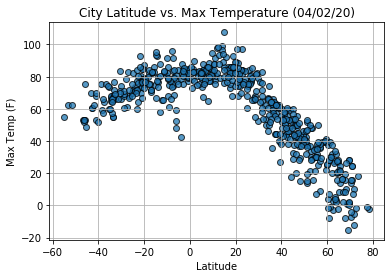

In [49]:
lat = city_df['Lat']
max_temp = city_df['Max Temp']

plt.scatter(lat, max_temp, alpha=.75, edgecolor='black')
plt.title("City Latitude vs. Max Temperature (04/02/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()

plt.savefig("output_data/LatVSMaxTemp.png")

#### Latitude vs. Humidity Plot

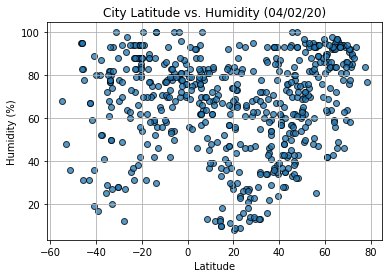

In [50]:
humid = city_df['Humidity']

plt.scatter(lat, humid, alpha=.75, edgecolor='black')
plt.title("City Latitude vs. Humidity (04/02/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("output_data/LatVSHumidity.png")

#### Latitude vs. Cloudiness Plot

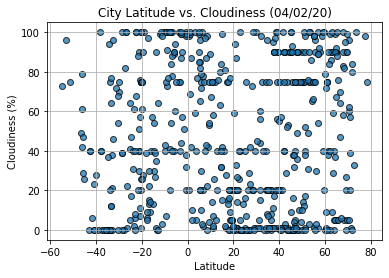

In [53]:
clouds = city_df['Cloudiness']

plt.scatter(lat, clouds, alpha=.75, edgecolor='black')
plt.title("City Latitude vs. Cloudiness (04/02/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("output_data/LatVSCloudiness.png")

#### Latitude vs. Wind Speed Plot

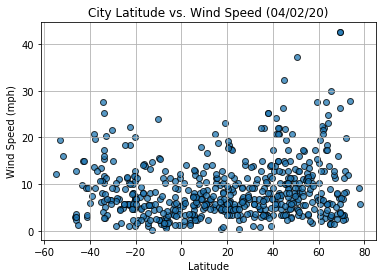

In [56]:
wind_speed = city_df['Wind Speed']

plt.scatter(lat, wind_speed, alpha=.75, edgecolor='black')
plt.title("City Latitude vs. Wind Speed (04/02/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("output_data/LatVSWindSpeed.png")

## Linear Regression

In [63]:
# OPTIONAL: Create a function to create Linear Regression plots

def plot_lin_reg(x_values, y_values, title, ylabel, location):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
    
    plt.scatter(x_values, y_values, alpha=.75, edgecolor='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.grid()

    print(f"The r-squared is {rvalue}")


In [64]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[(city_df['Lat'] >= 0)]
south_df = city_df.loc[(city_df['Lat'] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.914777826593331


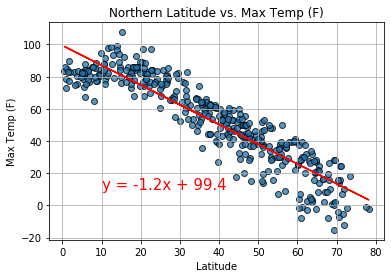

In [65]:
lat = north_df["Lat"]
max_temp = north_df["Max Temp"]
plot_lin_reg(lat, max_temp, "Northern Latitude vs. Max Temp (F)", "Max Temp (F)", (10,10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.56678879361606


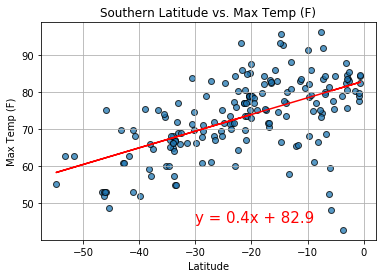

In [72]:
lat = south_df["Lat"]
max_temp = south_df["Max Temp"]
plot_lin_reg(lat, max_temp, "Southern Latitude vs. Max Temp (F)", "Max Temp (F)", (-30,45))

As expected, the further away you go from the equator, the lower the temperature gets. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.2993293458841908


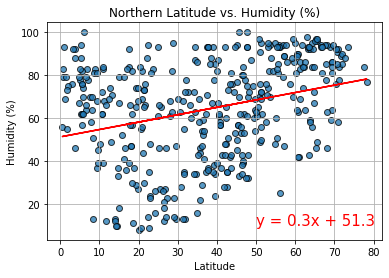

In [75]:
lat = north_df["Lat"]
humid = north_df["Humidity"]
plot_lin_reg(lat, humid, "Northern Latitude vs. Humidity (%)", "Humidity (%)", (50,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.20927555953965968


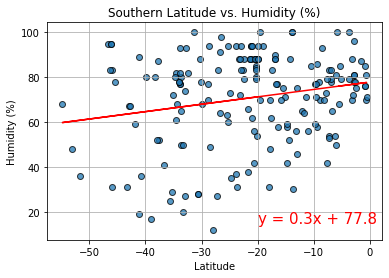

In [78]:
lat = south_df["Lat"]
humid = south_df["Humidity"]
plot_lin_reg(lat, humid, "Southern Latitude vs. Humidity (%)", "Humidity (%)", (-20,15))

The regression lines being so shallow seems to indicate that there is not much correlation between Latitude and Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.13506718271886473


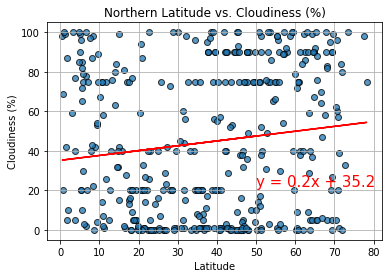

In [81]:
lat = north_df["Lat"]
cloud = north_df["Cloudiness"]
plot_lin_reg(lat, cloud, "Northern Latitude vs. Cloudiness (%)", "Cloudiness (%)", (50,22))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.325628129864676


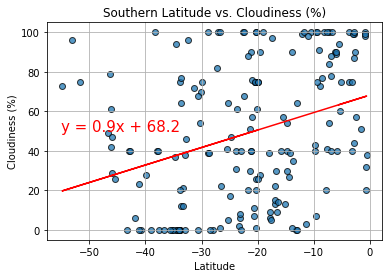

In [85]:
lat = south_df["Lat"]
cloud = south_df["Cloudiness"]
plot_lin_reg(lat, cloud, "Southern Latitude vs. Cloudiness (%)", "Cloudiness (%)", (-55,50))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.21617104545040788


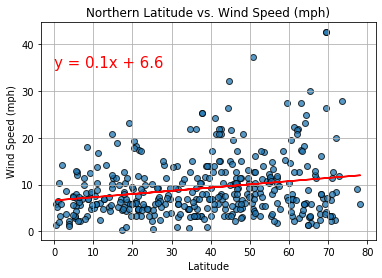

In [88]:
lat = north_df["Lat"]
wind_speed = north_df["Wind Speed"]
plot_lin_reg(lat, wind_speed, "Northern Latitude vs. Wind Speed (mph)", "Wind Speed (mph)", (0,35))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.29363915847100347


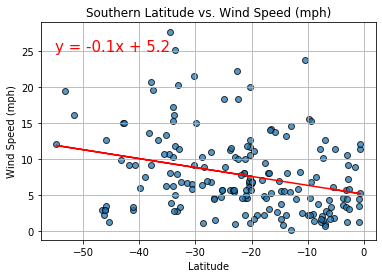

In [90]:
lat = south_df["Lat"]
wind_speed = south_df["Wind Speed"]
plot_lin_reg(lat, wind_speed, "Southern Latitude vs. Wind Speed (mph)", "Wind Speed (mph)", (-55,25))